# Floral Data Processing

# **Imports**

In [1]:
#Numpy
import numpy as np

#Pandas
import pandas as pd

#Seaborn
import seaborn as sns

#matplotlib
import matplotlib.pyplot as plt
import plotly

import warnings
warnings.filterwarnings("ignore")

# **Loading Data**

In [2]:
GDS = pd.read_csv('GDS')

In [3]:
GDS.head()

,Order #,Transaction Type,Order Time,Order Date,Delivery Date_x,Sender,Recipient,Product Total,Delivery_x,Nontaxable Delivery,...,Billing State,Billing Zip,Subtotal,Delivery_y,Sale Tax,Tip,Discount_y,Grand Total_y,Tax Exempt,Payment Method_y
0,100017453,Sale,03:28:16PM Sat,"Dec 29, 2018","Dec 29, 2018",Candyce Williams Glaser,NaN,$815.00,$0.00,$0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100017452,Sale,03:16:50PM Sat,"Dec 29, 2018","Dec 29, 2018",NaN,NaN,$249.90,$0.00,$0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100017451,Sale,02:58:53PM Sat,"Dec 29, 2018","Dec 29, 2018",NaN,NaN,$24.95,$0.00,$0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100017450,Sale,02:54:45PM Sat,"Dec 29, 2018","Dec 29, 2018",Tracie Hamilton,NaN,$635.00,$0.00,$0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100017202,Sale,02:48:15PM Sat,"Dec 29, 2018","Dec 23, 2018",Candyce Williams Glaser,Candyce Williams Glaser,$702.00,$0.00,$25.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Exploration**

In [4]:
print("There are", GDS.isna().sum().sum(), "missing values.")

There are 1879164 missing values.


In [5]:
GDS.isna().sum()

Order #                      0
Transaction Type          5449
Order Time                5449
Order Date                5449
Delivery Date_x           5458
Sender                   24781
Recipient                30983
Product Total             5449
Delivery_x                5449
Nontaxable Delivery       5449
Wire Out Fee              5449
Discount_x                5449
Gift Cards                5449
Tax                       5449
Tips                      5449
Grand Total_x             5449
Payment Method_x          5449
Order Type                5640
Order Method              5449
Order Source             47467
Sale Date                47467
Delivery Date_y          47467
Order Status             47467
Delivery Method          47467
Product Name             47467
Item Number              52778
Card Message             47671
Card Signature           49999
Occasion                 48108
Customer Name            47467
Customer Phone           47467
Customer Email           47496
Recipien

In [6]:
GDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52916 entries, 0 to 52915
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Order #                52916 non-null  int64  
 1   Transaction Type       47467 non-null  object 
 2   Order Time             47467 non-null  object 
 3   Order Date             47467 non-null  object 
 4   Delivery Date_x        47458 non-null  object 
 5   Sender                 28135 non-null  object 
 6   Recipient              21933 non-null  object 
 7   Product Total          47467 non-null  object 
 8   Delivery_x             47467 non-null  object 
 9   Nontaxable Delivery    47467 non-null  object 
 10  Wire Out Fee           47467 non-null  object 
 11  Discount_x             47467 non-null  object 
 12  Gift Cards             47467 non-null  object 
 13  Tax                    47467 non-null  object 
 14  Tips                   47467 non-null  object 
 15  Gr

# **Data Cleaning**

In [7]:
#Dropping unnecessary columns
columns_to_drop = ['Delivery Street 2','Billing Street 2', 'Delivery_x', 'Delivery_y', 'Discount_y', 'Discount_x', 'Card Signature', 
                   'Card Message', 'Tip','Customer Email', 'Customer Phone', 'Delivery Address Type', 'Tax Exempt', 'Grand Total_y', 
                   'Item Number', 'Billing Phone', 'Delivery Date_y', 'Payment Method_y', 'Sale Tax', 'Billing Name', 
                   'Billing Street', 'Billing City', 'Billing State', 'Billing Zip', 'Recipient Phone', 'Order Status']
df = GDS.drop(columns_to_drop, axis= 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52916 entries, 0 to 52915
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order #              52916 non-null  int64  
 1   Transaction Type     47467 non-null  object 
 2   Order Time           47467 non-null  object 
 3   Order Date           47467 non-null  object 
 4   Delivery Date_x      47458 non-null  object 
 5   Sender               28135 non-null  object 
 6   Recipient            21933 non-null  object 
 7   Product Total        47467 non-null  object 
 8   Nontaxable Delivery  47467 non-null  object 
 9   Wire Out Fee         47467 non-null  object 
 10  Gift Cards           47467 non-null  object 
 11  Tax                  47467 non-null  object 
 12  Tips                 47467 non-null  object 
 13  Grand Total_x        47467 non-null  object 
 14  Payment Method_x     47467 non-null  object 
 15  Order Type           47276 non-null 

In [8]:
# Check for unique values
unique_counts = df.nunique()
print(unique_counts)

Order #                51426
Transaction Type           3
Order Time             41876
Order Date              1683
Delivery Date_x         1740
Sender                 11032
Recipient              14112
Product Total           5472
Nontaxable Delivery      390
Wire Out Fee              52
Gift Cards                22
Tax                     4037
Tips                       5
Grand Total_x           9511
Payment Method_x          12
Order Type                 4
Order Method               5
Order Source               4
Sale Date               1434
Delivery Method            2
Product Name             535
Occasion                  37
Customer Name           3731
Recipient Name          4406
Delivery Street         4056
Delivery City             95
Delivery State            24
Delivery Zip              35
Subtotal                 157
dtype: int64


In [9]:
#Replacing nan values with 0
df.fillna(0, inplace = True)

In [10]:
#Check for remaining nan values
df.isna().sum()

Order #                0
Transaction Type       0
Order Time             0
Order Date             0
Delivery Date_x        0
Sender                 0
Recipient              0
Product Total          0
Nontaxable Delivery    0
Wire Out Fee           0
Gift Cards             0
Tax                    0
Tips                   0
Grand Total_x          0
Payment Method_x       0
Order Type             0
Order Method           0
Order Source           0
Sale Date              0
Delivery Method        0
Product Name           0
Occasion               0
Customer Name          0
Recipient Name         0
Delivery Street        0
Delivery City          0
Delivery State         0
Delivery Zip           0
Subtotal               0
dtype: int64

In [11]:
df.head()

,Order #,Transaction Type,Order Time,Order Date,Delivery Date_x,Sender,Recipient,Product Total,Nontaxable Delivery,Wire Out Fee,...,Delivery Method,Product Name,Occasion,Customer Name,Recipient Name,Delivery Street,Delivery City,Delivery State,Delivery Zip,Subtotal
0,100017453,Sale,03:28:16PM Sat,"Dec 29, 2018","Dec 29, 2018",Candyce Williams Glaser,0,$815.00,$0.00,$0.00,...,0,0,0,0,0,0,0,0,0.0,0.0
1,100017452,Sale,03:16:50PM Sat,"Dec 29, 2018","Dec 29, 2018",0,0,$249.90,$0.00,$0.00,...,0,0,0,0,0,0,0,0,0.0,0.0
2,100017451,Sale,02:58:53PM Sat,"Dec 29, 2018","Dec 29, 2018",0,0,$24.95,$0.00,$0.00,...,0,0,0,0,0,0,0,0,0.0,0.0
3,100017450,Sale,02:54:45PM Sat,"Dec 29, 2018","Dec 29, 2018",Tracie Hamilton,0,$635.00,$0.00,$0.00,...,0,0,0,0,0,0,0,0,0.0,0.0
4,100017202,Sale,02:48:15PM Sat,"Dec 29, 2018","Dec 23, 2018",Candyce Williams Glaser,Candyce Williams Glaser,$702.00,$25.00,$0.00,...,0,0,0,0,0,0,0,0,0.0,0.0


# **Changing Data Types**

In [12]:
#Specify the columns to convert to datetime
date_columns_to_convert = ['Order Date', 'Delivery Date_x', 'Order Time', 'Sale Date']
#Convert date columns to datetime
df[date_columns_to_convert] = df[date_columns_to_convert].apply(pd.to_datetime)

In [13]:
#Remove non-numeric characters from multiple columns
columns_to_convert = ['Product Total', 'Nontaxable Delivery', 'Wire Out Fee', 'Gift Cards', 'Tax', 'Tips','Grand Total_x','Subtotal']
df[columns_to_convert] = df[columns_to_convert].replace(r'[$,()\s]', '', regex=True)
#Convert multiple columns from object to float
df[columns_to_convert] = df[columns_to_convert].astype(float)

In [14]:
# Now the columns should be the correct data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52916 entries, 0 to 52915
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order #              52916 non-null  int64         
 1   Transaction Type     52916 non-null  object        
 2   Order Time           52916 non-null  datetime64[ns]
 3   Order Date           52916 non-null  datetime64[ns]
 4   Delivery Date_x      52916 non-null  datetime64[ns]
 5   Sender               52916 non-null  object        
 6   Recipient            52916 non-null  object        
 7   Product Total        52916 non-null  float64       
 8   Nontaxable Delivery  52916 non-null  float64       
 9   Wire Out Fee         52916 non-null  float64       
 10  Gift Cards           52916 non-null  float64       
 11  Tax                  52916 non-null  float64       
 12  Tips                 52916 non-null  float64       
 13  Grand Total_x        52916 non-

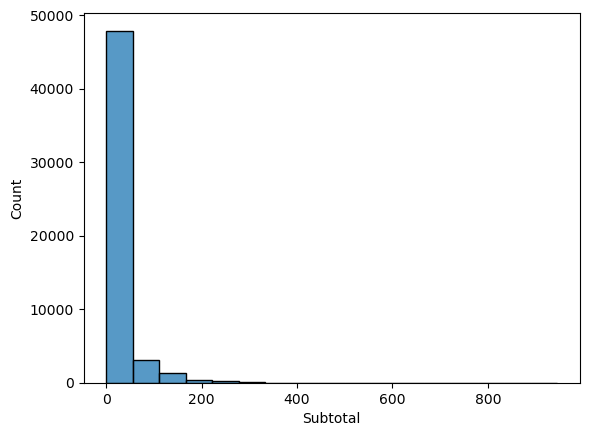

In [21]:
sns.histplot(data=df, x='Subtotal');

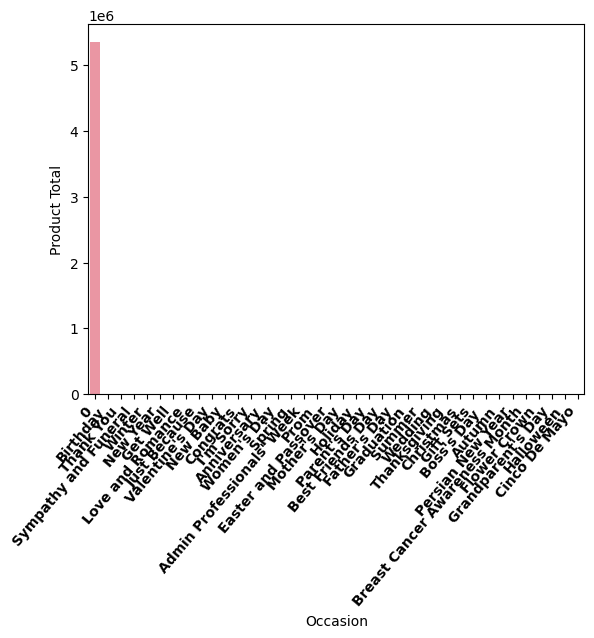

In [30]:
sns.barplot(y="Product Total", x="Occasion", data=df, estimator=sum, ci=None)
plt.xticks(rotation=50, fontsize = 10, fontweight = 'bold', ha = 'right')
plt.show();

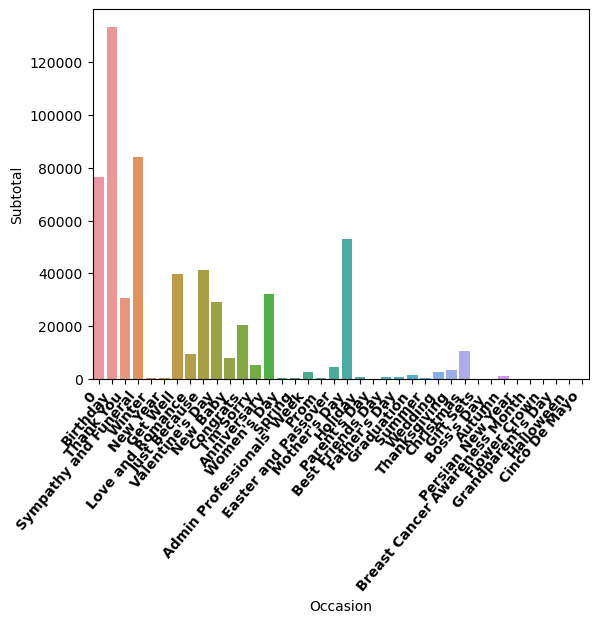

In [31]:
sns.barplot(y="Subtotal", x="Occasion", data=df, estimator=sum, ci=None)
plt.xticks(rotation=50, fontsize = 10, fontweight = 'bold', ha = 'right')
plt.show();